In [1]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt

In [2]:
actual_x = np.array([0.0,0.0,0.0])
u = np.array([0.2,math.pi / 180.0 * 20])

In [3]:
class Particle:
    def __init__(self,w):
        self.pose = np.array([0.0,0.0,0.0])
        self.weight = w
        
    def __repr__(self):
        return "pose:" + str(self.pose) + "weight: " + str(self.weight)

In [4]:
#particles = []
#for i in range(100):
#    particles.append(Particle(0.01))

particles = [ Particle(1.0/100) for i in range(100) ]

In [5]:
print(particles[0])

pose:[ 0.  0.  0.]weight: 0.01


In [6]:
def f(x_old,u):
    pos_x, pos_y, pos_theta = x_old
    act_fw, act_rot = u
    
    act_fw = random.gauss(act_fw,act_fw/10)
    dir_error = random.gauss(0.0, math.pi / 180.0 * 3.0)
    act_rot = random.gauss(act_rot,act_rot/10)
    
    pos_x += act_fw * math.cos(pos_theta + dir_error)
    pos_y += act_fw * math.sin(pos_theta + dir_error)
    pos_theta += act_rot
    
    return np.array([pos_x,pos_y,pos_theta])

In [7]:
import copy

path = [actual_x]
particle_path = [copy.deepcopy(particles)]

for i in range(10):
    actual_x = f(actual_x, u)
    path.append(actual_x)
    
    for p in particles:
        p.pose = f(p.pose,u)
    
    particle_path.append(copy.deepcopy(particles))

In [8]:
def draw(i,pose,particles):
    fig = plt.figure(i,figsize=(8,8))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-1.0,1.0)
    sp.set_ylim(-0.5,1.5)
    
    xs = [ e.pose[0] for e in particles ]
    ys = [ e.pose[1] for e in particles ]
    vxs = [math.cos(e.pose[2]) for e in particles ]
    vys = [math.sin(e.pose[2]) for e in particles ]
    plt.quiver(xs,ys,vxs,vys,color="blue")
    
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red")

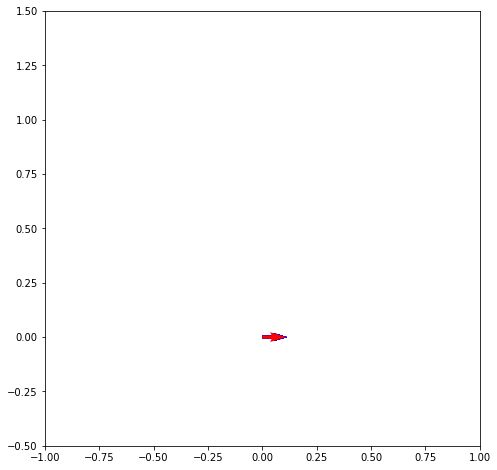

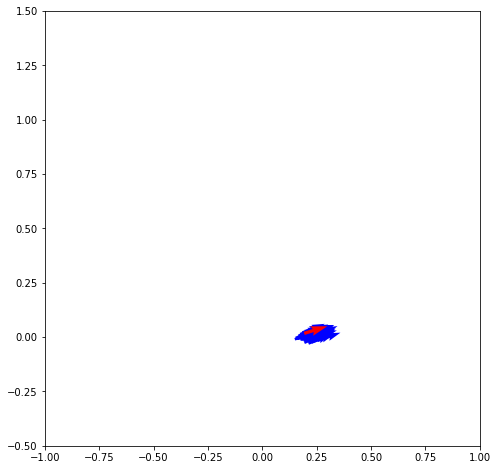

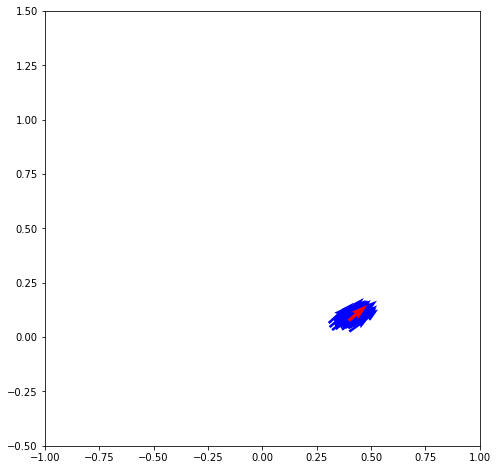

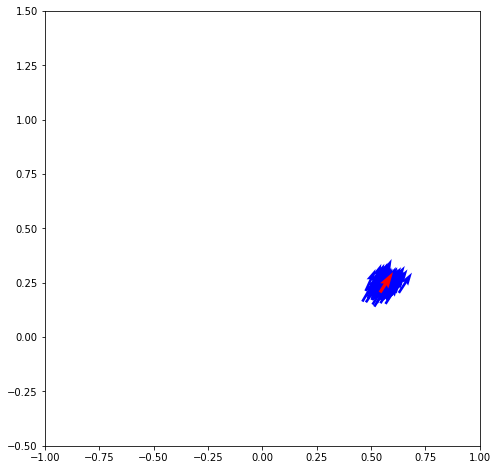

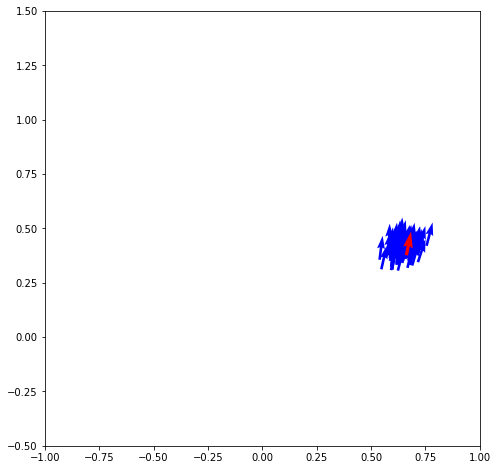

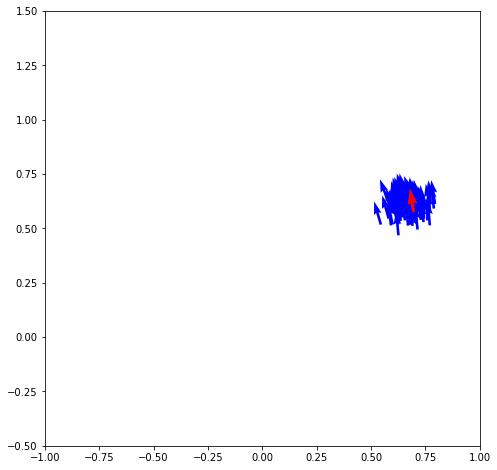

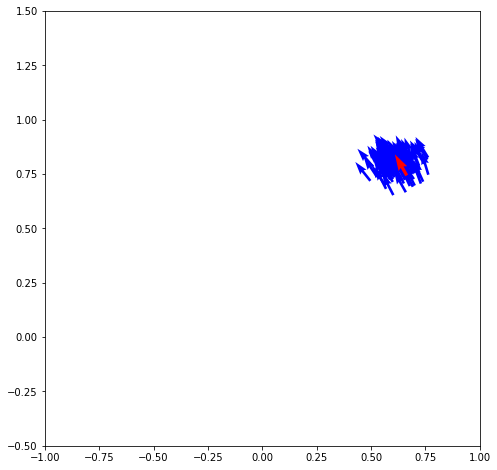

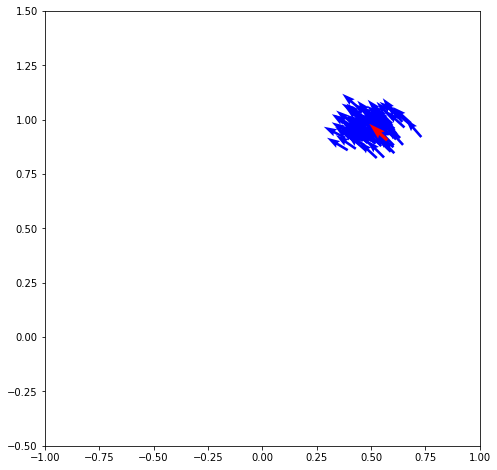

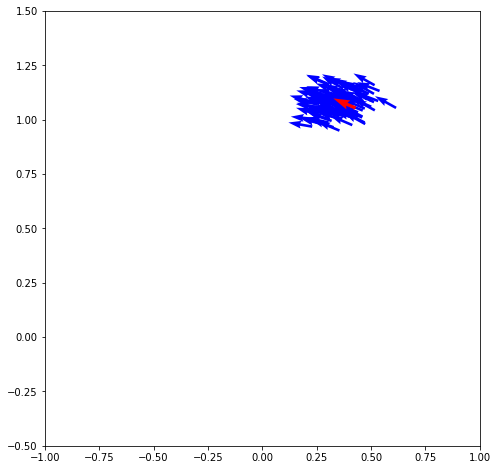

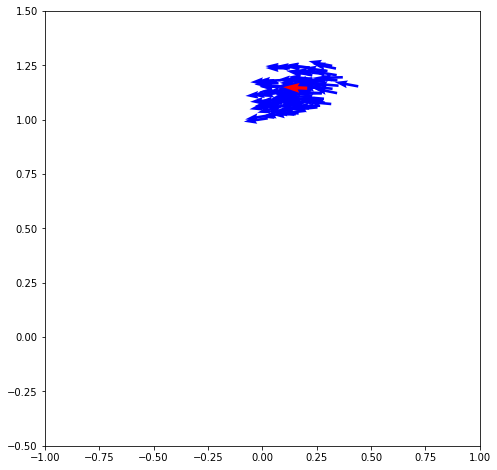

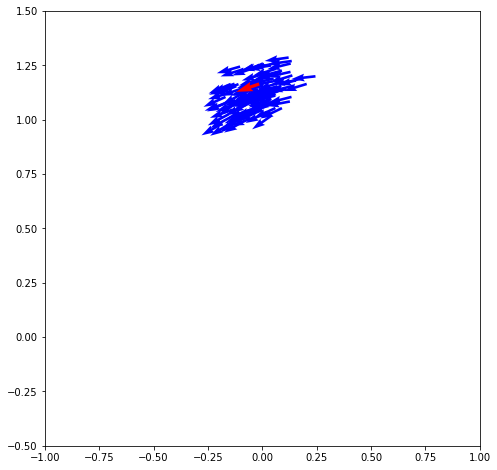

In [9]:
for i,p in enumerate(path):
    draw(i,p,particle_path[i])